# RII_Pandas Tutorial
riip v0.2.0

---

# RiiDataFrame
Let's start your survay of dielectric properties of various materials. The first thing you must do is to create a RiiDataFrame oject. The first trial will take a few minutes, because experimental data will be pulled down from Polyanskiy's [refractiveindex.info database](https://github.com/polyanskiy/refractiveindex.info-database) and equi-spaced grid data will be obtained by interpolating the experimental data.

In [2]:
import riip
ri = riip.RiiDataFrame()

Catalog file not found.
Creating catalog file...
Done.
Creating raw data file...
Done.
Updating grid data file...
Done.


RiiDataFrame has an attribute named __catalog__ that is a [Pandas](https://pandas.pydata.org/) DataFrame provinding the catalog of experimental data as shown below.
The columns _formula_ and _tabulated_ indicate the type of data. If n or k is included in the column __tamulated__, the experimentally observed data for the real part _n_ or the imaginary part _k_ is  given in tabulated form, respectively. If __tabulated__ is f, only coefficients of formula are given. 
On the other hand, the number written in the column __formula__ indicates the number of dispetsion formula that fits the experimental data. If the number is 0, only the tabulated data are given.

In [53]:
ri.catalog

,shelf,shelf_name,division,book,book_name,section,page,path,formula,tabulated,num_n,num_k,wl_n_min,wl_n_max,wl_k_min,wl_k_max,wl_min,wl_max
id,,,,,,,,,,,,,,,,,,
0,main,MAIN - simple inorganic materials,Ag - Silver,Ag,Ag (Silver),"Experimental data: bulk, thick film",Johnson,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,49,49,0.1879,1.937,0.1879,1.937,0.1879,1.937
1,main,MAIN - simple inorganic materials,Ag - Silver,Ag,Ag (Silver),"Experimental data: bulk, thick film",Choi,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,84,84,1.2310,6.988,1.2310,6.988,1.2310,6.988
2,main,MAIN - simple inorganic materials,Ag - Silver,Ag,Ag (Silver),"Experimental data: bulk, thick film",Jiang,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,1701,1701,0.3000,2.000,0.3000,2.000,0.3000,2.000
3,main,MAIN - simple inorganic materials,Ag - Silver,Ag,Ag (Silver),"Experimental data: bulk, thick film",Yang,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,525,525,0.2700,24.920,0.2700,24.920,0.2700,24.920
4,main,MAIN - simple inorganic materials,Ag - Silver,Ag,Ag (Silver),"Experimental data: bulk, thick film",McPeak,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,141,141,0.3000,1.700,0.3000,1.700,0.3000,1.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,BB-f22,BB - formula 22: Brendel-Bormann model,Ni - Nickel,Ni,Ni (Nickel),NaN,Rakic-BBF,/home/mnishida/anaconda3/envs/riip/lib/python3...,22,f,0,0,0.2066,12.400,0.2066,12.400,0.2066,12.400
2909,BB-f22,BB - formula 22: Brendel-Bormann model,Pd - Palladium,Pd,Pd (Palladium),NaN,Rakic-BBF,/home/mnishida/anaconda3/envs/riip/lib/python3...,22,f,0,0,0.2066,12.400,0.2066,12.400,0.2066,12.400
2910,BB-f22,BB - formula 22: Brendel-Bormann model,Pt - Platinum,Pt,Pt (Platinum),NaN,Rakic-BBF,/home/mnishida/anaconda3/envs/riip/lib/python3...,22,f,0,0,0.2066,12.400,0.2066,12.400,0.2066,12.400


In [54]:
ri.catalog.loc[ri.catalog.duplicated(subset=['book', 'page'], keep=False)]

,shelf,shelf_name,division,book,book_name,section,page,path,formula,tabulated,num_n,num_k,wl_n_min,wl_n_max,wl_k_min,wl_k_max,wl_min,wl_max
id,,,,,,,,,,,,,,,,,,
147,main,MAIN - simple inorganic materials,"C - Carbon, carbides and carbonates",C,"C (Carbon, diamond, graphite, graphene, carbon...",Highly oriented pyrolytic graphite (HOPG),Song-cHOPG-e,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,n,1084,0,0.193,1.690,0.193,1.690,0.193,1.690
149,main,MAIN - simple inorganic materials,"C - Carbon, carbides and carbonates",C,"C (Carbon, diamond, graphite, graphene, carbon...",Highly oriented pyrolytic graphite (HOPG),Song-cHOPG-e,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,n,1084,0,0.193,1.690,0.193,1.690,0.193,1.690
2225,glass,GLASS - glasses,Optical glass - CDGM,CDGM-ZLAF,CDGM - ZLAF (Dense lanthanum flint),NaN,D-ZLAF52LA,/home/mnishida/anaconda3/envs/riip/lib/python3...,3,k,0,29,0.365,1.014,0.365,1.014,0.365,1.014
2226,glass,GLASS - glasses,Optical glass - CDGM,CDGM-ZLAF,CDGM - ZLAF (Dense lanthanum flint),NaN,D-ZLAF52LA,/home/mnishida/anaconda3/envs/riip/lib/python3...,3,k,0,29,0.365,1.014,0.365,1.014,0.365,1.014


In [55]:
ri.catalog.loc[2225, 'path']

'/home/mnishida/anaconda3/envs/riip/lib/python3.8/site-packages/riip/data/refractiveindex.info-database/database/data/glass/cdgm/D-ZLAF52LA.yml'

In [56]:
ri.catalog.loc[2226, 'path']

'/home/mnishida/anaconda3/envs/riip/lib/python3.8/site-packages/riip/data/refractiveindex.info-database/database/data/glass/cdgm/D-ZLAF52LA.yml'

In [57]:
ri.catalog.loc[147, 'path']

'/home/mnishida/anaconda3/envs/riip/lib/python3.8/site-packages/riip/data/refractiveindex.info-database/database/data/main/C/Song-cHOPG-e.yml'

In [58]:
ri.catalog.loc[149, 'path']

'/home/mnishida/anaconda3/envs/riip/lib/python3.8/site-packages/riip/data/refractiveindex.info-database/database/data/main/C/Song-sHOPG-e.yml'

The experimental data are given by __raw_data__:

In [59]:
ri.raw_data.loc[3].head(5)  # first 5 rows for the material whose id is 3

,c,wl_n,n,wl_k,k
id,,,,,
3,0.0,0.27,1.364,0.27,1.3180
3,0.0,0.28,1.477,0.28,1.2400
3,0.0,0.29,1.531,0.29,1.1680
3,0.0,0.30,1.609,0.30,0.9126
3,0.0,0.31,1.373,0.31,0.5192


where n (k) is the real (imaginary) part of complex refractive index at the vacuum wavelength wl_n (wl_k) in the unit of &mu;m.
The column __c__ gives the coefficients for the dielectric function model.

In the above example, no coefficient is given because only the tabulated data are given (__formula__ number in __catalog__ is 0).
On the other hand, if __formula__ number is not 0, some coefficeints are given in the column __c__ as shown below.
In this case, __formula__ 21 means Drude-Lorentz model, which is explained in [Dispersion formulas](https://github.com/mnishida/RII_Pandas/blob/master/riip/data/my_database/doc/Dispersion%20formulas.pdf).

In [60]:
ri.raw_data.loc[2912].head(5)  # first 5 rows for the material whose id is 2912

,c,wl_n,n,wl_k,k
id,,,,,
2912,1.000,0.0,0.0,0.0,0.0
2912,0.197,0.0,0.0,0.0,0.0
2912,0.057,0.0,0.0,0.0,0.0
2912,13.220,0.0,0.0,0.0,0.0
2912,0.006,0.0,0.0,0.0,0.0


Using the method _load_grid_data()_, you can get grid data calculated at 200 wavelength values in the range [__wl_min__, __wl_max__], which is the intersection between the domain of _n_ [__wl_n_min__, __wl_n_max__] and the domain of _k_ [__wl_k_min__, __wl_k_max__]. These values are shown in __catalog__.

In [61]:
grid_data = ri.load_grid_data()
grid_data.loc[3]

,wl,n,k
id,,,
3,0.270000,1.364000,1.318000
3,0.393869,0.059485,2.018235
3,0.517739,0.052102,3.214629
3,0.641608,0.059822,4.218323
3,0.765477,0.074199,5.168388
...,...,...,...
3,24.424523,48.255097,149.084182
3,24.548392,48.638823,149.663136
3,24.672261,49.022549,150.242091


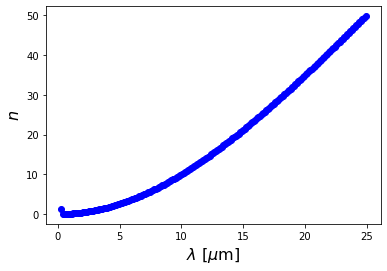

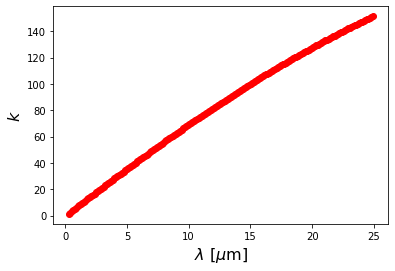

In [62]:
import matplotlib.pyplot as plt
ID = 3
wls = grid_data.loc[ID, 'wl']
ns = grid_data.loc[ID, 'n']
ks = grid_data.loc[ID, 'k']
plt.plot(wls, ns, "bo")
plt.xlabel(r"$\lambda$ [$\mu$m]", fontsize=16)
plt.ylabel(r"$n$", fontsize=16)
plt.show()
plt.plot(wls, ks, "ro")
plt.xlabel(r"$\lambda$ [$\mu$m]", fontsize=16)
plt.ylabel(r"$k$", fontsize=16)
plt.show()

# Helper Methods
By using the functionality of Pandas, you may find what you want, easily. But, here some simple helper methods are implemented.


## __search__
```
search(name: str) -> DataFrame
```
This method searches data whose __book__ or __book_name__ contain given __name__ and return a simplified catalog for them.

In [63]:
ri.search("NaCl")

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
182,NaCl,NaN,Li,1,f,0.20,30.0000
183,NaCl,NaN,Querry,0,nk,0.22,166.6667


In [64]:
ri.search("sodium") # upper or lower case is not significant

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
127,NaBr,NaN,Li,1,f,0.210000,34.000000
182,NaCl,NaN,Li,1,f,0.200000,30.000000
183,NaCl,NaN,Querry,0,nk,0.220000,166.666700
229,NaF,NaN,Li,1,f,0.150000,17.000000
295,NaI,NaN,Jellison,1,f,0.436000,0.633000
296,NaI,NaN,Li,1,f,0.250000,40.000000
376,Na,Solid,Smith,0,nk,0.312539,2.237982
377,Na,Solid,Inagaki,0,nk,0.326000,2.066000
378,Na,Solid,Monin,0,nk,0.253600,0.620000


## select
```
select(condition: str) -> DataFrame
```
This method make a query with the given __condition__ and return a simplified catalog. It will pick up materials whose experimental data contains some data that fulfill given __condition__.

In [65]:
ri.select("2.5 < n < 3 and 0.4 < wl < 0.8").head(10)

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
23,Al,Experimental data,Mathewson,0,nk,0.495940,1.771200
118,Bi,Experimental data,Hagemann,0,nk,0.000002,6.199000
129,TlBr,NaN,Palik,1,f,0.570000,39.400000
135,C,Amorphous thin film,Larruquert,0,nk,0.019656,10.079189
137,C,Graphite,Djurisic-o,0,nk,0.030996,10.332000
146,C,Highly oriented pyrolytic graphite (HOPG),Song-cHOPG-o,0,nk,0.193000,1.690000
150,C,Graphene,Weber,0,nk,0.210873,0.999007
151,C,Graphene,El-Sayed,0,nk,0.240000,1.000000
152,C,Graphene,Song,0,nk,0.193000,1.690000


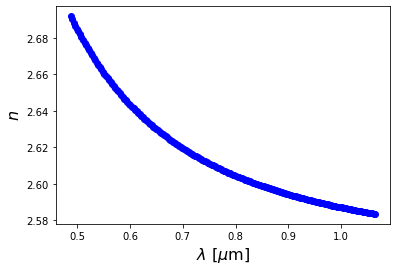

In [66]:
ID = 157
import matplotlib.pyplot as plt
plt.plot(grid_data.loc[ID, 'wl'], grid_data.loc[ID, 'n'], "bo")
plt.xlabel(r"$\lambda$ [$\mu$m]", fontsize=16)
plt.ylabel(r"$n$", fontsize=16)
plt.show()

## __show__
```
show(ids: Union[int, Sequence[int]]) -> DataFrame
```
This method shows a simplified catalog for given __ids__.

In [67]:
ri.show(1)

book                                          Ag
section      Experimental data: bulk, thick film
page                                        Choi
formula                                        0
tabulated                                     nk
wl_min                                     1.231
wl_max                                     6.988
Name: 1, dtype: object

## __read__
```
read(id, as_dict=False)
```
This method returns the contants of a page associated with the id.
If you want the page contents as a python dict, give True for argument __as_dict__. 

In [68]:
print(ri.read(0))

# this file is part of refractiveindex.info database
# refractiveindex.info database is in the public domain
# copyright and related rights waived via CC0 1.0

REFERENCES: "P. B. Johnson and R. W. Christy. Optical constants of the noble metals, <a href=\"https://doi.org/10.1103/PhysRevB.6.4370\"><i>Phys. Rev. B</i> <b>6</b>, 4370-4379 (1972)</a>"
COMMENTS: "Room temperature"
DATA:
  - type: tabulated nk
    data: |
        0.1879 1.07 1.212
        0.1916 1.10 1.232
        0.1953 1.12 1.255
        0.1993 1.14 1.277
        0.2033 1.15 1.296
        0.2073 1.18 1.312
        0.2119 1.20 1.325
        0.2164 1.22 1.336
        0.2214 1.25 1.342
        0.2262 1.26 1.344
        0.2313 1.28 1.357
        0.2371 1.28 1.367
        0.2426 1.30 1.378
        0.2490 1.31 1.389
        0.2551 1.33 1.393
        0.2616 1.35 1.387
        0.2689 1.38 1.372
        0.2761 1.41 1.331
        0.2844 1.41 1.264
        0.2924 1.39 1.161
        0.3009 1.34 0.964
        0.3107 1.13 0.616
        0

In [9]:
ri.read(0, as_dict=True)

{'REFERENCES': 'P. B. Johnson and R. W. Christy. Optical constants of the noble metals, <a href="https://doi.org/10.1103/PhysRevB.6.4370"><i>Phys. Rev. B</i> <b>6</b>, 4370-4379 (1972)</a>',
 'COMMENTS': 'Room temperature',
 'DATA': [{'type': 'tabulated nk',
   'data': '0.1879 1.07 1.212\n0.1916 1.10 1.232\n0.1953 1.12 1.255\n0.1993 1.14 1.277\n0.2033 1.15 1.296\n0.2073 1.18 1.312\n0.2119 1.20 1.325\n0.2164 1.22 1.336\n0.2214 1.25 1.342\n0.2262 1.26 1.344\n0.2313 1.28 1.357\n0.2371 1.28 1.367\n0.2426 1.30 1.378\n0.2490 1.31 1.389\n0.2551 1.33 1.393\n0.2616 1.35 1.387\n0.2689 1.38 1.372\n0.2761 1.41 1.331\n0.2844 1.41 1.264\n0.2924 1.39 1.161\n0.3009 1.34 0.964\n0.3107 1.13 0.616\n0.3204 0.81 0.392\n0.3315 0.17 0.829\n0.3425 0.14 1.142\n0.3542 0.10 1.419\n0.3679 0.07 1.657\n0.3815 0.05 1.864\n0.3974 0.05 2.070\n0.4133 0.05 2.275\n0.4305 0.04 2.462\n0.4509 0.04 2.657\n0.4714 0.05 2.869\n0.4959 0.05 3.093\n0.5209 0.05 3.324\n0.5486 0.06 3.586\n0.5821 0.05 3.858\n0.6168 0.06 4.152\n0.6595 

## __references__
```
references(id)
```
This method returns the REFERENCES of a page associated with the id.

In [17]:
ri.references(20)

## __material__
```
material(id: int, bound_check: bool = True) -> Material
```
This method returns __Material__-class instance for given __id__. The functionality of __Material__ class is explained below.

In [70]:
ID = 428
water = ri.material(ID)
water.catalog

shelf                                                      main
shelf_name                    MAIN - simple inorganic materials
division                                  O - Oxygen and oxides
book                                                        H2O
book_name     H<sub>2</sub>O, D<sub>2</sub>O (Water, heavy w...
section                                       Liquid water, H2O
page                                                  Kedenburg
path          /home/mnishida/anaconda3/envs/riip/lib/python3...
formula                                                       2
tabulated                                                     k
num_n                                                         0
num_k                                                      1132
wl_n_min                                                    0.5
wl_n_max                                                    1.6
wl_k_min                                                    0.5
wl_k_max                                

# Material Class:
```
Material(id: int, catalog: DataFrame, raw_data: DataFrame, bound_check: bool = True)
```
This class provides the dielectric function for the material specified by given id. If the argument __bound_check__ is True, ValueError is raised when the wavelength exeeds the domain of experimental data.

In [71]:
ID = 428
water = riip.Material(ID, ri.catalog, ri.raw_data)
print(f"{water.catalog['book']} {water.catalog['page']}")
print(f"{water.catalog['wl_min']} <= λ <= {water.catalog['wl_max']}")

H2O Kedenburg
0.5 <= λ <= 1.6


## Funcitons for refractive index and permittivity
### Reflactive Index __n__ + i __k__
```
n(wls: numpy.ndarray) -> numpy.ndarray
```
```
k(wls: numpy.ndarray) -> numpy.ndarray
```
### Dielectric Function __eps__
```
eps(wls: numpy.ndarray) -> numpy.ndarray
```
Wavelengths __wls__ can be given as a single complex value or an array of complex values.

In [72]:
wl = 1.0
n = water.n(wl)
k = water.k(wl)
eps = water.eps(wl)
print(f"At λ={wl}μm:")
print(f"  n={n}")
print(f"  k={k}")
print(f"  ε={eps}")

At λ=1.0μm:
  n=1.3248733548067675
  k=3.19106e-06
  ε=(1.755289406266756+8.455500735179367e-06j)


In [73]:
import numpy as np
wls = np.linspace(0.5, 1.6)
water.eps(wls)

array([1.78768541+5.06456045e-09j, 1.78467437+7.15205496e-09j,
       1.78200425+8.94726970e-09j, 1.77961713+1.08666065e-08j,
       1.77746656+2.03456790e-08j, 1.77551486+3.91797098e-08j,
       1.77373123+4.46648626e-08j, 1.77209021+5.55516860e-08j,
       1.77057063+6.46736868e-08j, 1.76915476+9.55086451e-08j,
       1.7678276 +2.26809001e-07j, 1.76657643+4.35996520e-07j,
       1.76539035+4.41911135e-07j, 1.76425999+3.88897897e-07j,
       1.76317722+3.67527138e-07j, 1.76213497+6.57038199e-07j,
       1.76112705+7.97313691e-07j, 1.76014799+9.89984646e-07j,
       1.75919296+1.26258703e-06j, 1.75825763+2.11417683e-06j,
       1.75733815+5.56077734e-06j, 1.75643103+9.70066579e-06j,
       1.75553309+9.02235619e-06j, 1.75464145+6.69285893e-06j,
       1.75375346+4.42035410e-06j, 1.75286666+3.28212930e-06j,
       1.75197876+3.47790570e-06j, 1.75108763+4.87739542e-06j,
       1.75019124+7.76700844e-06j, 1.74928768+2.35293686e-05j,
       1.74837512+2.93316807e-05j, 1.74745178+3.1702583

## Bound_check
By default, __bound_check__ is set to __True__, so a ValueError is raised if the given range of wavelength exeeds the domain of experimental data.

In [74]:
wls = np.linspace(1.0, 2.0)  # exeeds the domain of experimental data [wl_min, wl_max]
water.eps(wls)

ValueError: Wavelength [1.0 2.0] is out of bounds [0.5 1.6][um]

If the instance is created with _bound_check_=False, the dispersion formula is applied beyond the scope of experimental data.

In [ ]:
wls = np.linspace(1.0, 2.0)  # exeeds the domain of experimental data [wl_min, wl_max]
water = ri.material(ID, bound_check=False)
water.eps(wls)

array([1.75528941+8.45550074e-06j, 1.7544798 +6.22861833e-06j,
       1.75367283+4.26777142e-06j, 1.75286666+3.28212930e-06j,
       1.75205958+3.40958327e-06j, 1.75124999+4.57539314e-06j,
       1.75043634+6.43219717e-06j, 1.7496172 +1.73159504e-05j,
       1.74879115+2.79107526e-05j, 1.74795686+3.03863024e-05j,
       1.74711301+3.16625864e-05j, 1.74625834+3.09037928e-05j,
       1.7453916 +2.96001344e-05j, 1.74451155+2.87261241e-05j,
       1.74361698+3.09576021e-05j, 1.74270668+3.94605082e-05j,
       1.74177943+5.74328831e-05j, 1.74083401+8.45012883e-05j,
       1.73986919+1.12277638e-04j, 1.73888371+2.38893947e-04j,
       1.73787627+5.97354544e-04j, 1.73684562+7.93195467e-04j,
       1.73579043+8.44647738e-04j, 1.73470932+8.36225191e-04j,
       1.73360089+7.44545306e-04j, 1.73246365+6.09033937e-04j,
       1.73129606+4.84067121e-04j, 1.73009655+3.87576718e-04j,
       1.72886346+3.10291027e-04j, 1.72759506+2.69631077e-04j,
       1.72628955+2.42340278e-04j, 1.72494502+2.2370766

## plot method

### plot(wls: numpy.ndarray, comp: str = "n", fmt: str = "-", **kwargs)
* wls: Array of wavelength
* comp: 'n', 'k' or 'eps'
* fmt: The plot format string, such as "b-", "k--", "r:" etc.

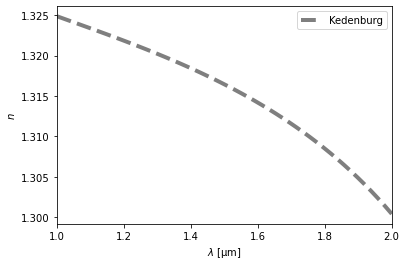

In [ ]:
water.plot(wls, "n", "k--")

You can change the plot style using rcParams of matplotlib.

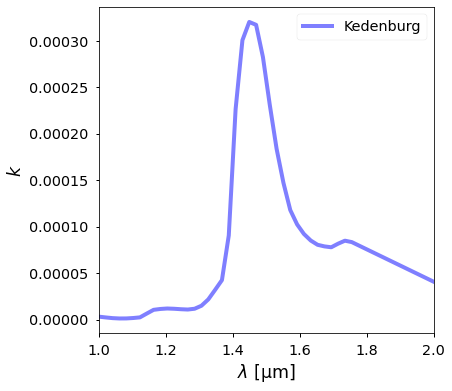

In [ ]:
plt.style.use('seaborn-notebook')
plot_params = {
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 'xx-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'legend.fontsize': 'x-large',
}
plt.rcParams.update(plot_params)
water.plot(wls, "k", "b-")